City_Tier, Occupation 두개 제외하고 전부

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Font settings
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # Prevent minus sign issues


orgDf = pd.read_csv('../../datasets/data.csv')
orgDf.head()

In [ ]:
editedDf = orgDf.drop(['City_Tier', 'Occupation'], axis=1)
editedDf

In [85]:
# # 기본적인 상관관계 계산
correlation_matrix = editedDf.corr()

# # 시각화를 포함한 상관관계 분석
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 히트맵으로 시각화
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('상관관계 히트맵')
# plt.show()


In [86]:
# type(correlation_matrix), correlation_matrix

In [87]:
# # 모든 수치형 컬럼에 대해서만 실행하는 경우
# numeric_columns = correlation_matrix.select_dtypes(include=['int64', 'float64']).columns

# for col in numeric_columns:
#     print(f"\n{'='*50}")
#     print(f"컬럼명: {col}")
#     print(f"\n상위 4개 값:")
#     print(correlation_matrix[col].nlargest(4).to_frame())
#     print(f"\n하위 3개 값:")
#     print(correlation_matrix[col].nsmallest(3).to_frame())


각 변수별로 자기 자신을 제외한 상위 3개와 하위 3개의 상관관계를 표로 정리하겠습니다:

| 변수 | 강한 양의 상관관계 (상위 3개) | 약한/음의 상관관계 (하위 3개) |
|------|---------------------------|---------------------------|
| Income | Groceries(0.986), Transport(0.982), Healthcare(0.979) | Age(-0.005), Dependents(0.017), Loan_Repayment(0.448) |
| Age | Desired_Savings_Percentage(0.002), Potential_Savings_Entertainment(0.001), Loan_Repayment(-0.001) | Potential_Savings_Misc(-0.013), Dependents(-0.011), Potential_Savings_Education(-0.010) |
| Dependents | Education(0.301), Potential_Savings_Education(0.237), Miscellaneous(0.024) | Disposable_Income(-0.060), Age(-0.011), Loan_Repayment(-0.002) |
| Rent | Income(0.939), Groceries(0.926), Transport(0.923) | Age(-0.007), Dependents(0.018), Loan_Repayment(0.420) |
| Loan_Repayment | Income(0.448), Utilities(0.439), Groceries(0.438) | Dependents(-0.002), Age(-0.001), Disposable_Income(0.106) |
| Insurance | Income(0.944), Groceries(0.928), Transport(0.927) | Age(-0.002), Dependents(0.018), Loan_Repayment(0.430) |
| Groceries | Income(0.986), Transport(0.968), Healthcare(0.965) | Age(-0.005), Dependents(0.016), Loan_Repayment(0.438) |
| Transport | Income(0.982), Groceries(0.968), Healthcare(0.960) | Age(-0.007), Dependents(0.015), Loan_Repayment(0.434) |
| Eating_Out | Income(0.940), Groceries(0.930), Healthcare(0.922) | Age(-0.005), Dependents(0.016), Loan_Repayment(0.413) |
| Entertainment | Income(0.944), Groceries(0.931), Transport(0.926) | Age(-0.004), Dependents(0.016), Loan_Repayment(0.426) |
| Utilities | Income(0.964), Groceries(0.950), Transport(0.946) | Age(-0.004), Dependents(0.017), Loan_Repayment(0.439) |
| Healthcare | Income(0.979), Groceries(0.965), Transport(0.960) | Age(-0.006), Dependents(0.014), Loan_Repayment(0.438) |
| Education | Potential_Savings_Education(0.805), Income(0.795), Groceries(0.779) | Age(-0.007), Dependents(0.301), Loan_Repayment(0.345) |
| Miscellaneous | Income(0.920), Groceries(0.905), Healthcare(0.905) | Age(-0.007), Dependents(0.024), Loan_Repayment(0.421) |
| Desired_Savings | Income(0.945), Transport(0.928), Groceries(0.926) | Age(-0.005), Dependents(0.009), Loan_Repayment(0.311) |
| Disposable_Income | Desired_Savings(0.906), Income(0.882), Transport(0.862) | Dependents(-0.060), Age(-0.003), Loan_Repayment(0.106) |

이 표를 통해 몇 가지 주요 패턴을 발견할 수 있습니다:
1. Income, Groceries, Transport가 대부분의 변수와 강한 양의 상관관계를 보입니다.
2. Age, Dependents, Loan_Repayment는 대부분의 변수와 약한 상관관계를 보입니다.
3. 대부분의 변수들이 서로 양의 상관관계를 가지고 있습니다.

In [88]:
# Income | Groceries(0.986), Transport(0.982), Healthcare(0.979)
# Disposable_Income | Desired_Savings(0.906), Income(0.882), Transport(0.862)
# Education | Potential_Savings_Education(0.805), Income(0.795), Groceries(0.779)
# Dependents | Education(0.301), Potential_Savings_Education(0.237), Miscellaneous(0.024)



In [ ]:
orgDf['Occupation'].unique()
onlyHired = orgDf[orgDf['Occupation'].isin(['Self_Employed', 'Professional'])]
onlyHired

columns_needed = [
    'Income', 'Groceries', 'Transport', 'Healthcare',
    'Disposable_Income', 'Desired_Savings',
    'Education', 'Potential_Savings_Education',
    'Dependents', 'Miscellaneous'
]

onlyHired = onlyHired[columns_needed]
corrOnlyHired = onlyHired.corr()
corrOnlyHired

# numeric_columns = corrOnlyHired.select_dtypes(include=['int64', 'float64']).columns

# for col in numeric_columns:
#     print(f"\n{'='*50}")
#     print(f"컬럼명: {col}")
#     print(f"\n상위 4개 값:")
#     print(corrOnlyHired[col].nlargest(4).to_frame())


|기준 변수|순위|상관 변수|상관계수| |기준 변수|순위|상관 변수|상관계수|
|---|---|---|---|---|---|---|---|---|
|Income|1|Groceries|0.985726| |Healthcare|1|Income|0.978350|
||2|Transport|0.982221| ||2|Groceries|0.966182|
||3|Healthcare|0.978350| ||3|Transport|0.958890|
|Groceries|1|Income|0.985726| |Disposable_Income|1|Desired_Savings|0.909683|
||2|Transport|0.967465| ||2|Income|0.886986|
||3|Healthcare|0.966182| ||3|Transport|0.868372|
|Transport|1|Income|0.982221| |Desired_Savings|1|Income|0.949945|
||2|Groceries|0.967465| ||2|Transport|0.934787|
||3|Healthcare|0.958890| ||3|Groceries|0.931580|
|Education|1|Potential_Savings_Education|0.818560| |Dependents|1|Education|0.284511|
||2|Income|0.818557| ||2|Potential_Savings_Education|0.222282|
||3|Groceries|0.803221| ||3|Miscellaneous|0.018284|
|Potential_Savings_Education|1|Education|0.818560| |Miscellaneous|1|Income|0.923732|
||2|Income|0.683119| ||2|Groceries|0.910246|
||3|Transport|0.674761| ||3|Healthcare|0.909787|

In [ ]:
orgDf['Occupation'].unique()
onlyNonHired = orgDf[orgDf['Occupation'].isin(['Retired', 'Student'])]
onlyNonHired

columns_needed = [
    'Income', 'Groceries', 'Transport', 'Healthcare',
    'Disposable_Income', 'Desired_Savings',
    'Education', 'Potential_Savings_Education',
    'Dependents', 'Miscellaneous'
]

onlyNonHired = onlyNonHired[columns_needed]
corrOnlyNonHired = onlyNonHired.corr()
corrOnlyNonHired

# numeric_columns = corrOnlyNonHired.select_dtypes(include=['int64', 'float64']).columns

# for col in numeric_columns:
#     print(f"\n{'='*50}")
#     print(f"컬럼명: {col}")
#     print(f"\n상위 4개 값:")
#     print(corrOnlyNonHired[col].nlargest(4).to_frame())


|기준 변수|순위|상관 변수|상관계수| |기준 변수|순위|상관 변수|상관계수|
|---|---|---|---|---|---|---|---|---|
|Income|1|Income|1.000000| |Healthcare|1|Healthcare|1.000000|
||2|Groceries|0.985745| ||2|Income|0.979432|
||3|Transport|0.981671| ||3|Groceries|0.963566|
||4|Healthcare|0.979432| ||4|Transport|0.961506|
|Groceries|1|Groceries|1.000000| |Disposable_Income|1|Disposable_Income|1.000000|
||2|Income|0.985745| ||2|Desired_Savings|0.901595|
||3|Transport|0.968155| ||3|Income|0.875385|
||4|Healthcare|0.963566| ||4|Transport|0.853810|
|Transport|1|Transport|1.000000| |Desired_Savings|1|Desired_Savings|1.000000|
||2|Income|0.981671| ||2|Income|0.938164|
||3|Groceries|0.968155| ||3|Transport|0.919902|
||4|Healthcare|0.961506| ||4|Groceries|0.919234|
|Education|1|Education|1.000000| |Dependents|1|Dependents|1.000000|
||2|Potential_Savings_Education|0.788236| ||2|Education|0.321011|
||3|Income|0.766076| ||3|Potential_Savings_Education|0.255772|
||4|Healthcare|0.754006| ||4|Miscellaneous|0.030514|
|Potential_Savings_Education|1|Potential_Savings_Education|1.000000| |Miscellaneous|1|Miscellaneous|1.000000|
||2|Education|0.788236| ||2|Income|0.914601|
||3|Income|0.601780| ||3|Groceries|0.899117|
||4|Healthcare|0.591402| ||4|Healthcare|0.898925|

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 두 그룹 간의 상관계수 차이 계산
correlation_diff = corrOnlyHired - corrOnlyNonHired

# 히트맵으로 시각화
plt.figure(figsize=(15, 5))

# 첫 번째 서브플롯: 고용된 그룹의 상관관계
plt.subplot(131)
sns.heatmap(corrOnlyHired, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('고용된 그룹의 상관관계')

# 두 번째 서브플롯: 미고용 그룹의 상관관계
plt.subplot(132)
sns.heatmap(corrOnlyNonHired, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('미고용 그룹의 상관관계')

# 세 번째 서브플롯: 상관관계 차이
plt.subplot(133)
sns.heatmap(correlation_diff, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('상관관계 차이 (고용 - 미고용)')

plt.tight_layout()
plt.show()

# 주요 차이점 분석
print("\n주요 상관관계 차이점:")
for col1 in columns_needed:
    for col2 in columns_needed:
        if col1 < col2:  # 중복 방지
            diff = correlation_diff.loc[col1, col2]
            if abs(diff) > 0.1:  # 차이가 0.1 이상인 경우만 출력
                print(f"{col1} vs {col2}: {diff:.3f}")


In [ ]:
# 각 그룹의 평균값 계산
hired_means = onlyHired.mean()
nonhired_means = onlyNonHired.mean()

# 평균값 차이 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(columns_needed))

plt.bar(index, hired_means, bar_width, label='고용된 그룹')
plt.bar(index + bar_width, nonhired_means, bar_width, label='미고용 그룹')

plt.xlabel('변수')
plt.ylabel('평균값')
plt.title('고용 상태별 평균 지출/수입 비교')
plt.xticks(index + bar_width/2, columns_needed, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# 평균값 차이 분석
print("\n각 변수별 평균값 차이 (고용 - 미고용):")
diff_percent = (hired_means - nonhired_means) / nonhired_means * 100
for col in columns_needed:
    print(f"{col}: {diff_percent[col]:.1f}%")


In [93]:
orgDf['City_Tier'].unique() # ['Tier_1', 'Tier_2', 'Tier_3']
onlyCity1 = orgDf[orgDf['City_Tier'].isin(['Tier_1'])]
onlyCity2 = orgDf[orgDf['City_Tier'].isin(['Tier_2'])]
onlyCity3 = orgDf[orgDf['City_Tier'].isin(['Tier_3'])]

columns_needed = [
    'Income', 'Groceries', 'Transport', 'Healthcare',
    'Disposable_Income', 'Desired_Savings',
    'Education', 'Potential_Savings_Education',
    'Dependents', 'Miscellaneous'
]

onlyCity1 = onlyCity1[columns_needed]
corrOnlyCity1 = onlyCity1.corr()

onlyCity2 = onlyCity1[columns_needed]
corrOnlyCity2 = onlyCity1.corr()

onlyCity3 = onlyCity1[columns_needed]
corrOnlyCity3 = onlyCity1.corr()


# numeric_columns = corrOnlyCity1.select_dtypes(include=['int64', 'float64']).columns

# for col in numeric_columns:
#     print(f"\n{'='*50}")
#     print(f"컬럼명: {col}")
#     print(f"\n상위 4개 값:")
#     print(corrOnlyCity1[col].nlargest(4).to_frame())
#     print(corrOnlyCity2[col].nlargest(4).to_frame())
#     print(corrOnlyCity3[col].nlargest(4).to_frame())


| 변수 | Tier 1 | Tier 2 | Tier 3 |
|:---|:---|:---|:---|
| Income | Groceries (0.986)<br>Transport (0.982)<br>Healthcare (0.978) | Groceries (0.986)<br>Transport (0.982)<br>Healthcare (0.979) | Groceries (0.986)<br>Transport (0.981)<br>Healthcare (0.980) |
| Disposable Income | Desired Savings (0.910)<br>Income (0.887)<br>Transport (0.868) | Desired Savings (0.902)<br>Income (0.875)<br>Transport (0.854) | Desired Savings (0.933)<br>Income (0.840)<br>Healthcare (0.819) |
| Education | Income (0.819)<br>Groceries (0.803)<br>Transport (0.801) | Income (0.808)<br>Transport (0.799)<br>Groceries (0.795) | Income (0.766)<br>Healthcare (0.754)<br>Groceries (0.751) |

주요 특징:
1. Income 관련 상관관계는 모든 도시 등급에서 유사한 패턴을 보임
2. Disposable Income의 상관관계는 Tier 3에서 Healthcare가 새롭게 등장
3. Education 관련 상관관계는 Tier 1에서 Tier 3로 갈수록 약해지는 경향을 보임
4. Healthcare의 중요도는 Tier 3에서 상대적으로 높게 나타남

In [100]:
# orgDf['Income'].unique()
# orgDf['Income'].describe()
# orgDf['Income'].info()
# orgDf[['Income']]

# Income 데이터의 1% 지점 계산
percentile_99 = orgDf['Income'].quantile(0.99)

# 하위 99%와 상위 1% 데이터 분리
lower_99 = orgDf[orgDf['Income'] <= percentile_99]['Income']
upper_1 = orgDf[orgDf['Income'] > percentile_99]['Income']

print("=== Income 구간 분리 ===")
print("\n[하위 99% 데이터]")
print(f"데이터 수: {len(lower_99)}")
print(f"평균: {lower_99.mean():.2f}")
print(f"표준편차: {lower_99.std():.2f}")
print(f"최소값: {lower_99.min():.2f}")
print(f"최대값: {lower_99.max():.2f}")

print("\n[상위 1% 데이터]")
print(f"데이터 수: {len(upper_1)}")
print(f"평균: {upper_1.mean():.2f}")
print(f"표준편차: {upper_1.std():.2f}")
print(f"최소값: {upper_1.min():.2f}")
print(f"최대값: {upper_1.max():.2f}")



=== Income 구간 분리 ===

[하위 99% 데이터]
데이터 수: 19800
평균: 39286.49
표준편차: 31489.93
최소값: 1301.19
최대값: 195484.87

[상위 1% 데이터]
데이터 수: 200
평균: 269186.77
표준편차: 98316.22
최소값: 195609.56
최대값: 1079728.37


In [101]:
# 필요한 컬럼 리스트
columns_needed = [
    'Income', 'Groceries', 'Transport', 'Healthcare',
    'Disposable_Income', 'Desired_Savings',
    'Education', 'Potential_Savings_Education',
    'Dependents', 'Miscellaneous'
]

# 하위 99% 데이터에 대한 상관관계 분석
lower_99_df = orgDf[orgDf['Income'] <= percentile_99][columns_needed]
lower_99_corr = lower_99_df.corr()['Income'].sort_values(ascending=False)

# 상위 1% 데이터에 대한 상관관계 분석
upper_1_df = orgDf[orgDf['Income'] > percentile_99][columns_needed]
upper_1_corr = upper_1_df.corr()['Income'].sort_values(ascending=False)

print("=== 하위 99% 소득층의 Income과의 상관관계 ===")
print(lower_99_corr)
print("\n=== 상위 1% 소득층의 Income과의 상관관계 ===")
print(upper_1_corr)

# 두 그룹 간의 상관관계 차이 비교
corr_diff = upper_1_corr - lower_99_corr
print("\n=== 상관관계 차이(상위 1% - 하위 99%) ===")
print(corr_diff)

# 시각화를 위한 데이터프레임 생성
import pandas as pd
comparison_df = pd.DataFrame({
    '하위 99%': lower_99_corr,
    '상위 1%': upper_1_corr,
    '차이': corr_diff
})

print("\n=== 상관관계 비교표 ===")
print(comparison_df)


=== 하위 99% 소득층의 Income과의 상관관계 ===
Income                         1.000000
Groceries                      0.983301
Transport                      0.978058
Healthcare                     0.974537
Desired_Savings                0.931341
Miscellaneous                  0.909177
Disposable_Income              0.861365
Education                      0.751953
Potential_Savings_Education    0.581508
Dependents                     0.008529
Name: Income, dtype: float64

=== 상위 1% 소득층의 Income과의 상관관계 ===
Income                         1.000000
Transport                      0.939202
Groceries                      0.933959
Healthcare                     0.906611
Desired_Savings                0.829717
Disposable_Income              0.723560
Miscellaneous                  0.706470
Potential_Savings_Education    0.601928
Education                      0.568008
Dependents                    -0.000537
Name: Income, dtype: float64

=== 상관관계 차이(상위 1% - 하위 99%) ===
Dependents                    -0.009067
D

=== 하위 99% 소득층의 Income과의 상관관계 ===
Income                             1.000000
Groceries                          0.983301
Transport                          0.978058
Healthcare                         0.974537
Utilities                          0.956137
Desired_Savings                    0.931341
Eating_Out                         0.931214
Insurance                          0.931201
Entertainment                      0.927219
Rent                               0.926495
Miscellaneous                      0.909177
Disposable_Income                  0.861365
Desired_Savings_Percentage         0.827381
Potential_Savings_Groceries        0.821405
Potential_Savings_Transport        0.820058
Potential_Savings_Utilities        0.800859
Potential_Savings_Entertainment    0.784438
Potential_Savings_Eating_Out       0.781615
Potential_Savings_Miscellaneous    0.771751
Education                          0.751953
Potential_Savings_Healthcare       0.716798
Potential_Savings_Education        0.58150

<Figure size 1500x800 with 0 Axes>

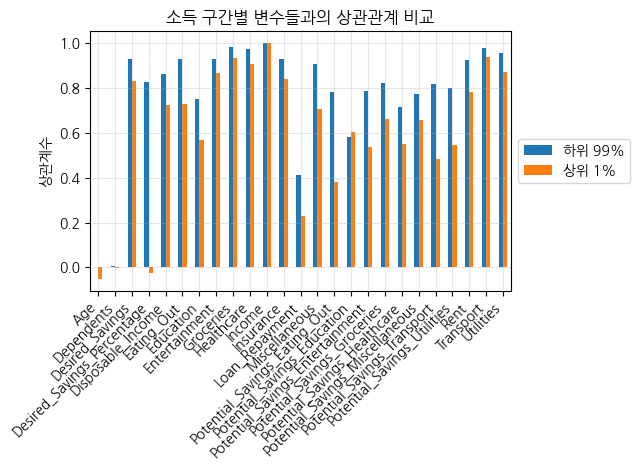

In [104]:
# Occupation과 City_Tier를 제외한 모든 수치형 컬럼 선택
columns_needed = [col for col in orgDf.columns if col not in ['Occupation', 'City_Tier']]

# 하위 99% 데이터에 대한 상관관계 분석
lower_99_df = orgDf[orgDf['Income'] <= percentile_99][columns_needed]
lower_99_corr = lower_99_df.corr()['Income'].sort_values(ascending=False)

# 상위 1% 데이터에 대한 상관관계 분석
upper_1_df = orgDf[orgDf['Income'] > percentile_99][columns_needed]
upper_1_corr = upper_1_df.corr()['Income'].sort_values(ascending=False)

print("=== 하위 99% 소득층의 Income과의 상관관계 ===")
print(lower_99_corr)
print("\n=== 상위 1% 소득층의 Income과의 상관관계 ===")
print(upper_1_corr)

# 두 그룹 간의 상관관계 차이 비교
corr_diff = upper_1_corr - lower_99_corr
print("\n=== 상관관계 차이(상위 1% - 하위 99%) ===")
print(corr_diff)

# 시각화를 위한 데이터프레임 생성
comparison_df = pd.DataFrame({
    '하위 99%': lower_99_corr,
    '상위 1%': upper_1_corr,
    '차이': corr_diff
})

print("\n=== 상관관계 비교표 ===")
print(comparison_df)

# 차이의 절대값을 기준으로 정렬
top_3_diff = corr_diff.abs().sort_values(ascending=False)[:3]

print("=== 상위 1%와 하위 99% 간 상관관계 차이가 가장 큰 상위 3개 변수 ===")
for var, diff in top_3_diff.items():
    print(f"\n{var}:")
    print(f"하위 99% 상관계수: {lower_99_corr[var]:.4f}")
    print(f"상위 1% 상관계수: {upper_1_corr[var]:.4f}")
    print(f"차이: {corr_diff[var]:.4f}")


# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
comparison_df[['하위 99%', '상위 1%']].plot(kind='bar')
plt.title('소득 구간별 변수들과의 상관관계 비교')
plt.xticks(rotation=45, ha='right')
plt.ylabel('상관계수')
plt.grid(True, alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
